# Lab 9: Grid Localization using Bayes Filter on the Virtual Robot

#### <span style="color:rgb(0,150,0)">It is recommended that you close any heavy-duty applications running on your system while working on this lab.</span>

#### This notebook showcases localization results of the **Localization** module (defined in *robot_interface.py*) for the virtual robot.

<hr>


In [12]:
# Automatically reload changes in python modules
%load_ext autoreload
%autoreload 2

# Import classes
from robot_interface import *

import time
import numpy as np
import rospy
from Traj import Trajectory

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from gridmap import OccupancyGridMap
import matplotlib.pyplot as plt
from a_star import a_star
from utils import plot_path

In [14]:
# Instantiate VirtualRobot to communicate with the real robot
robot = VirtualRobot()

# Instantiate Mapper
# Start points for each line segment describing the map
start_points = np.array([[0,0],
                         [3.04,0],
                         [3.04,3.04],
                         [0,3.04],
                         [0,0],
                         [0,0.608],
                         [0.608,0.608],
                         [0.608,0.912],
                         [0,0.912],
                         [0,2.128],
                         [1.216,2.128],
                         [1.216,1.52],
                         [2.584,1.52],
                         [2.584,0.912],
                         [1.52,0.304]])

# End points for each line segment describing the map
end_points = np.array([  [3.04,0],
                         [3.04,3.04],
                         [0,3.04],
                         [0,0],
                         [0,0.608],
                         [0.608,0.608],
                         [0.608,0.912],
                         [0,0.912],
                         [0,2.128],
                         [1.216,2.128],
                         [1.216,1.52],
                         [2.584,1.52],
                         [2.584,0.912],
                         [1.52,0.304],
                         [0,0]])

# Requires a RealRobot object as input
mapper = Mapper(min_x=0, max_x=3.04, min_y=0, max_y=3.04, min_a=-180, max_a=180,
                cell_size_x=0.152, cell_size_y=0.152, cell_size_a=20,
                max_cells_x=20, max_cells_y=20, max_cells_a=18,
                ray_length=7, lines=[start_points, end_points], obs_per_cell=18, 
                robot=robot)
#mapper.populate_views()

# Instantiate Localization 
odom_trans_sigma = 0.33
odom_rot_sigma = 15
sensor_sigma = 0.11

# Requires a RealRobot object and a Mapper object as inputs
loc = Localization(robot, mapper, sensor_sigma, odom_trans_sigma, odom_rot_sigma)

# Visualize the map (described using line segments) in the plotter
loc.plotter.visualize_map()

Using python version: 3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0] 

Initializing Node
Initializing Virtual Robot
Initializing beliefs with a Uniform Distribution
Uniform Belief with each cell value:  0.0001388888888888889


In [ ]:
import subprocess

subprocess.run(["/bin/bash","-c", "wmctrl -a 'Plotter'"])
subprocess.run(["/bin/bash","-c","scrot -d 4 -u -quality 100 map.png"])
gmap = OccupancyGridMap.from_png('map.png', 1)
gmap.plot()

In [ ]:
#robot.get_gt_pose()
robot.get_laser_data()

In [20]:
def check_front(robot):
    return robot.get_laser_data() < 0.2

def move_to_next(currPos, nextPos, robot):
    print(str(currPos) + " to " + str(nextPos))
    #while(round(robot.get_gt_pose()[0],2) != nextPos[0] and round(robot.get_gt_pose()[1],2) != nextPos[1]):
    print(robot.get_gt_pose())
    if(currPos[0]>nextPos[0]): #moving left
        print("moving left")
        #print(robot.get_gt_pose())
        nextAng = 180;
        while(round(robot.get_gt_pose()[2]) != nextAng): #wait till it gets to the right angle
            robot.set_vel(0,0.1)
        #print("@ 180")
        while(round(robot.get_gt_pose()[0],2) > nextPos[0]): #wait till it gets to the right distance
            robot.set_vel(0.1,0)
        #print("@ location")
        #print(robot.get_gt_pose())

    if(currPos[0]<nextPos[0]): #moving right
        print("moving right")
        #print(robot.get_gt_pose())
        nextAng = 0;
        while(round(robot.get_gt_pose()[2]) != nextAng): #wait till it gets to the right angle
            robot.set_vel(0,0.1)
        #print("@ 0")
        while(round(robot.get_gt_pose()[0],2) < nextPos[0]): #wait till it gets to the right distance
            robot.set_vel(0.1,0)
        #print("@ location")
        #print(robot.get_gt_pose())

    if(currPos[1]>nextPos[1]): #moving down
        print("moving down")
        #print(robot.get_gt_pose())
        nextAng = -90;
        while(round(robot.get_gt_pose()[2]) != nextAng): #wait till it gets to the right angle
            robot.set_vel(0,0.1)
        #print("@ -90")
        while(round(robot.get_gt_pose()[1],2) > nextPos[1] and (not check_front(robot))): #wait till it gets to the right distance
            robot.set_vel(0.1,0)
        #print("@ location")
        #print(robot.get_gt_pose())

    if(currPos[1]<nextPos[1]): #moving up
        print("moving up")
        #print(robot.get_gt_pose())
        nextAng = 90;
        while(round(robot.get_gt_pose()[2]) != nextAng): #wait till it gets to the right angle
            robot.set_vel(0,0.1)
        #print("@ 90")
        while(round(robot.get_gt_pose()[1],2) < nextPos[1] and (not check_front(robot))): #wait till it gets to the right distance
            robot.set_vel(0.1,0)
        #print("@ location")
        #print(robot.get_gt_pose())

    print("DONE WITH STEP")
    robot.set_vel(0,0)

Start cell:  (13, 2)
Goal cell:  (8, 8)


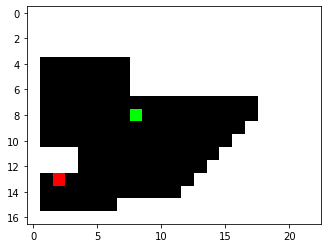

-----------------
(1, 1, 0) to (0.304, 0.608, 0)
(1.0, 1.0, 0.0)
moving left
moving down
DONE WITH STEP
(0.304, 0.608, 0) to (0.45599999999999996, 0.608, 0)
(0.2990452965457926, 0.6011159984864647, -90.13687849338494)
moving right
DONE WITH STEP
(0.45599999999999996, 0.608, 0) to (0.608, 0.608, 0)
(0.45904448485193305, 0.6006063501995551, -0.18250465784561978)
moving right
DONE WITH STEP
(0.608, 0.608, 0) to (0.608, 0.76, 0)
(0.6090437238889391, 0.6001285549305774, -0.18250465784561978)
moving up
DONE WITH STEP
(0.608, 0.76, 0) to (0.608, 0.9119999999999999, 0)
(0.6096807836415982, 0.7601272866595249, 89.7718691776937)
moving up
DONE WITH STEP
(0.608, 0.9119999999999999, 0) to (0.608, 1.064, 0)
(0.6103178433942572, 0.9201260183884724, 89.7718691776937)
moving up
DONE WITH STEP
(0.608, 1.064, 0) to (0.608, 1.216, 0)
(0.6109150869123751, 1.0701248293843606, 89.7718691776937)
moving up
DONE WITH STEP
(0.608, 1.216, 0) to (0.608, 1.3679999999999999, 0)
(0.6115123304304929, 1.22012364038024

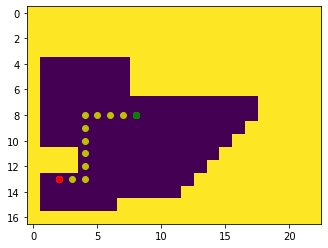

Start cell:  (10, 9)
Goal cell:  (15, 3)


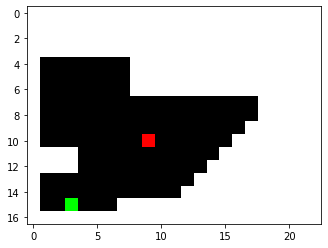

-----------------
(1, 1, 0) to (1.3679999999999999, 1.064, 0)
(1.2220971956486435, 1.36623640290282, -0.36500931569121176)
moving right
moving up
DONE WITH STEP
(1.3679999999999999, 1.064, 0) to (1.216, 1.064, 0)
(1.3720941518043903, 1.36528081721266, 89.5893645198481)
moving left
DONE WITH STEP
(1.216, 1.064, 0) to (1.064, 1.064, 0)
(1.2120992248684959, 1.3665549266184267, 179.54373835538598)
moving left
DONE WITH STEP
(1.064, 1.064, 0) to (0.9119999999999999, 1.064, 0)
(1.0621039808660948, 1.367749404186333, 179.54373835538598)
moving left
DONE WITH STEP
(0.9119999999999999, 1.064, 0) to (0.76, 1.064, 0)
(0.9121087368636938, 1.3689438817542392, 179.54373835538598)
moving left
DONE WITH STEP
(0.76, 1.064, 0) to (0.608, 1.064, 0)
(0.7621134928612927, 1.3701383593221454, 179.54373835538598)
moving left
DONE WITH STEP
(0.608, 1.064, 0) to (0.608, 0.9119999999999999, 0)
(0.6021185659253983, 1.3714124687279121, 179.54373835538598)
moving down
DONE WITH STEP
(0.608, 0.9119999999999999, 0) t

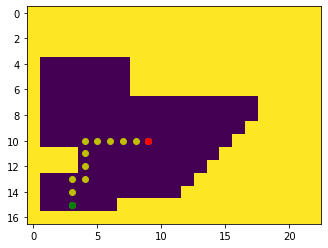

Start cell:  (7, 7)
Goal cell:  (14, 1)


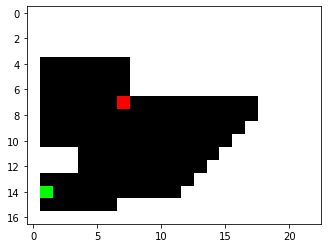

-----------------
(1, 1, 0) to (1.064, 1.52, 0)
(0.45249030646020094, 0.3015859147186116, -90.1114346717909)
moving right
moving up
DONE WITH STEP
(1.064, 1.52, 0) to (0.9119999999999999, 1.52, 0)
(1.0768037857426562, 1.519878721327202, 89.79731299928773)
moving left
DONE WITH STEP
(0.9119999999999999, 1.52, 0) to (0.76, 1.52, 0)
(0.9068053822557061, 1.5206154790132536, 179.75168683482562)
moving left
DONE WITH STEP
(0.76, 1.52, 0) to (0.608, 1.52, 0)
(0.7568067909436905, 1.5212655593244755, 179.75168683482562)
moving left
DONE WITH STEP
(0.608, 1.52, 0) to (0.608, 1.3679999999999999, 0)
(0.5968082935442073, 1.5219589783231122, 179.75168683482562)
moving down
DONE WITH STEP
(0.608, 1.3679999999999999, 0) to (0.608, 1.216, 0)
(0.595987463688273, 1.361961083842128, -90.2939393296365)
moving down
DONE WITH STEP
(0.608, 1.216, 0) to (0.608, 1.064, 0)
(0.5952179356983347, 1.2119630577662055, -90.2939393296365)
moving down
DONE WITH STEP
(0.608, 1.064, 0) to (0.608, 0.9119999999999999, 0)
(0

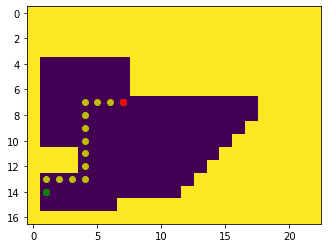

Start cell:  (8, 11)
Goal cell:  (15, 4)


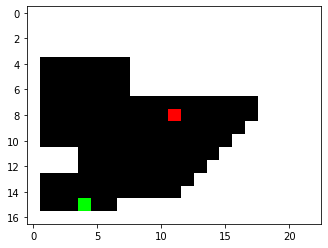

-----------------
(1, 1, 0) to (1.672, 1.3679999999999999, 0)
(0.1507704929483149, 0.44528502904968603, -90.4764439874821)
moving right
moving up
DONE WITH STEP
(1.672, 1.3679999999999999, 0) to (1.52, 1.3679999999999999, 0)
(1.680685405781964, 1.3666439050829455, 90.00526147872738)
moving left
DONE WITH STEP
(1.52, 1.3679999999999999, 0) to (1.3679999999999999, 1.3679999999999999, 0)
(1.5206854454872056, 1.3667566245404397, 179.95963531426526)
moving left
DONE WITH STEP
(1.3679999999999999, 1.3679999999999999, 0) to (1.216, 1.3679999999999999, 0)
(1.3606854851924473, 1.3668693439979338, 179.95963531426526)
moving left
DONE WITH STEP
(1.216, 1.3679999999999999, 0) to (1.064, 1.3679999999999999, 0)
(1.2106855224161113, 1.3669750184893346, 179.95963531426526)
moving left
DONE WITH STEP
(1.064, 1.3679999999999999, 0) to (0.9119999999999999, 1.3679999999999999, 0)
(1.0606855596397753, 1.3670806929807353, 179.95963531426526)
moving left
DONE WITH STEP
(0.9119999999999999, 1.3679999999999999

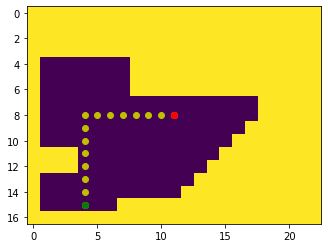

Start cell:  (6, 5)
Goal cell:  (10, 11)


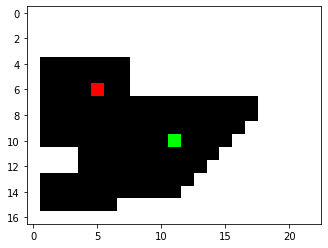

-----------------
(1, 1, 0) to (0.76, 1.672, 0)
(0.599079793290309, 0.29740596649282897, -90.08599085019688)
moving left
moving up
DONE WITH STEP
(0.76, 1.672, 0) to (0.9119999999999999, 1.672, 0)
(0.6077444585987614, 1.6773787646215055, 89.64025216303618)
moving right
DONE WITH STEP
(0.9119999999999999, 1.672, 0) to (1.064, 1.672, 0)
(0.9177328134994338, 1.6746917912360766, -0.4966263303487333)
moving right
DONE WITH STEP
(1.064, 1.672, 0) to (1.064, 1.52, 0)
(1.0677271787739535, 1.6733916428237723, -0.4966263303487333)
moving down
DONE WITH STEP
(1.064, 1.52, 0) to (1.216, 1.52, 0)
(1.0675686670532443, 1.5233917265770132, -90.06054702860284)
moving right
DONE WITH STEP
(1.216, 1.52, 0) to (1.3679999999999999, 1.52, 0)
(1.2175684095126855, 1.5231137659666478, -0.10617319306351468)
moving right
DONE WITH STEP
(1.3679999999999999, 1.52, 0) to (1.52, 1.52, 0)
(1.3675681519721268, 1.5228358053562825, -0.10617319306351468)
moving right
DONE WITH STEP
(1.52, 1.52, 0) to (1.672, 1.52, 0)
(1.

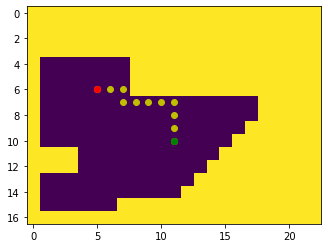

Start cell:  (8, 10)
Goal cell:  (5, 3)


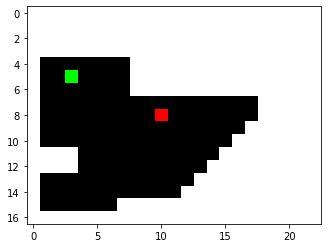

-----------------
(1, 1, 0) to (1.52, 1.3679999999999999, 0)
(1.6756162815707585, 1.0622654922735313, -90.24305168644842)
moving right
moving up
DONE WITH STEP
(1.52, 1.3679999999999999, 0) to (1.52, 1.52, 0)
(1.6774250300969, 1.3722602155008312, 89.6656959846302)
moving up
DONE WITH STEP
(1.52, 1.52, 0) to (1.3679999999999999, 1.52, 0)
(1.678300230996646, 1.5222576622237183, 89.6656959846302)
moving left
DONE WITH STEP
(1.3679999999999999, 1.52, 0) to (1.216, 1.52, 0)
(1.3583072662657312, 1.5243795770943747, 179.6200698201681)
moving left
DONE WITH STEP
(1.216, 1.52, 0) to (1.064, 1.52, 0)
(1.2083105640481149, 1.5253742246899948, 179.6200698201681)
moving left
DONE WITH STEP
(1.064, 1.52, 0) to (1.064, 1.672, 0)
(1.0583138618304986, 1.526368872285615, 179.6200698201681)
moving up
DONE WITH STEP
(1.064, 1.672, 0) to (1.064, 1.8239999999999998, 0)
(1.0581668637965966, 1.676368800257525, 90.05614912191544)
moving up
DONE WITH STEP
(1.064, 1.8239999999999998, 0) to (0.9119999999999999, 1.

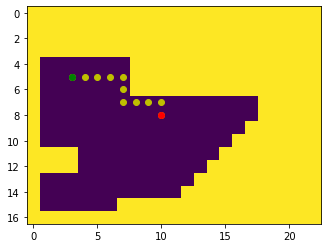

Start cell:  (12, 6)
Goal cell:  (10, 15)


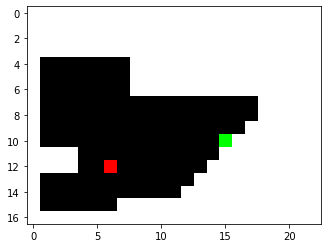

-----------------
(1, 1, 0) to (0.9119999999999999, 0.76, 0)
(0.44802261377532904, 1.8281997301041841, 179.82801829960772)
moving left
moving down
DONE WITH STEP
(0.9119999999999999, 0.76, 0) to (0.9119999999999999, 0.9119999999999999, 0)
(0.4439587916648405, 0.7582074472582474, -90.2176078648544)
moving up
DONE WITH STEP
(0.9119999999999999, 0.9119999999999999, 0) to (0.9119999999999999, 1.064, 0)
(0.4448212878571905, 0.9182051225548542, 89.69113980622424)
moving up
DONE WITH STEP
(0.9119999999999999, 1.064, 0) to (1.064, 1.064, 0)
(0.44562987803751863, 1.0682029431454223, 89.69113980622424)
moving right
DONE WITH STEP
(1.064, 1.064, 0) to (1.216, 1.064, 0)
(1.0656111162204212, 1.0633796350281426, -0.445738687160663)
moving right
DONE WITH STEP
(1.216, 1.064, 0) to (1.3679999999999999, 1.064, 0)
(1.2156065770711248, 1.0622127056449298, -0.445738687160663)
moving right
DONE WITH STEP
(1.3679999999999999, 1.064, 0) to (1.52, 1.064, 0)
(1.3656020379218285, 1.061045776261717, -0.445738687

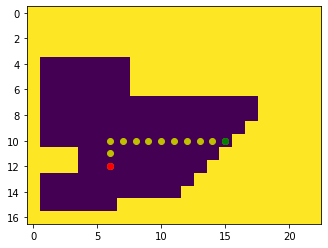

Start cell:  (10, 9)
Goal cell:  (7, 16)


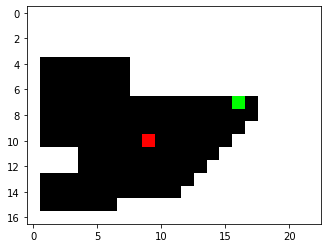

-----------------
(1, 1, 0) to (1.3679999999999999, 1.064, 0)
(2.2755745004160914, 1.0539664046702257, -0.445738687160663)
moving right
moving up
DONE WITH STEP
(1.3679999999999999, 1.064, 0) to (1.3679999999999999, 1.216, 0)
(2.275746017003449, 1.0739656692082096, 89.50863514837866)
moving up
DONE WITH STEP
(1.3679999999999999, 1.216, 0) to (1.3679999999999999, 1.3679999999999999, 0)
(2.277032391408632, 1.2239601532430884, 89.50863514837866)
moving up
DONE WITH STEP
(1.3679999999999999, 1.3679999999999999, 0) to (1.3679999999999999, 1.52, 0)
(2.2783187658138147, 1.3739546372779672, 89.50863514837866)
moving up
DONE WITH STEP
(1.3679999999999999, 1.52, 0) to (1.52, 1.52, 0)
(2.2796051402189974, 1.523949121312846, 89.50863514837866)
moving right
DONE WITH STEP
(1.52, 1.52, 0) to (1.672, 1.52, 0)
(2.2796051402189974, 1.523949121312846, -0.05528554987544436)
moving right
DONE WITH STEP
(1.672, 1.52, 0) to (1.8239999999999998, 1.52, 0)
(2.2796051402189974, 1.523949121312846, -0.05528554987

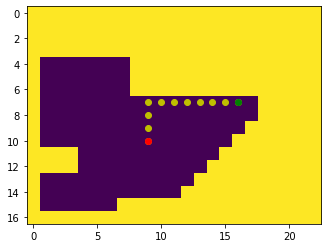

Start cell:  (10, 10)
Goal cell:  (15, 4)


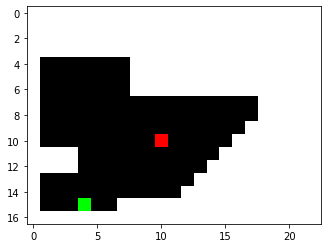

-----------------
(1, 1, 0) to (1.52, 1.064, 0)
(2.439605065734149, 1.5237947349569474, -0.05528554987544436)
moving right
moving up
DONE WITH STEP
(1.52, 1.064, 0) to (1.3679999999999999, 1.064, 0)
(2.439605065734149, 1.5237947349569474, 89.89908828566388)
moving left
DONE WITH STEP
(1.3679999999999999, 1.064, 0) to (1.216, 1.064, 0)
(1.359608597956704, 1.5265569058866895, 179.85346212120177)
moving left
DONE WITH STEP
(1.216, 1.064, 0) to (1.064, 1.064, 0)
(1.2096090885431687, 1.5269405407380425, 179.85346212120177)
moving left
DONE WITH STEP
(1.064, 1.064, 0) to (0.9119999999999999, 1.064, 0)
(1.0596095791296334, 1.5273241755893956, 179.85346212120177)
moving left
DONE WITH STEP
(0.9119999999999999, 1.064, 0) to (0.76, 1.064, 0)
(0.9096100697160991, 1.5277078104407487, 179.85346212120177)
moving left
DONE WITH STEP
(0.76, 1.064, 0) to (0.608, 1.064, 0)
(0.7596105603025655, 1.5280914452921017, 179.85346212120177)
moving left
DONE WITH STEP
(0.608, 1.064, 0) to (0.608, 0.9119999999999

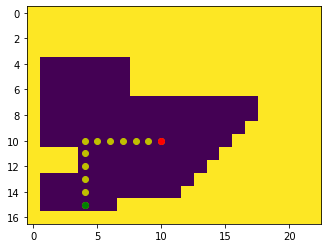

Start cell:  (13, 2)
Goal cell:  (5, 2)


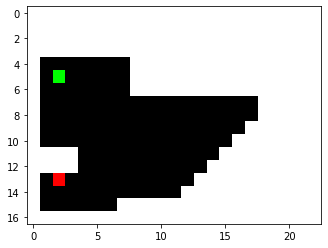

-----------------
(1, 1, 0) to (0.304, 0.608, 0)
(0.5954858001603945, 0.29850757369096953, -90.19216404326036)
moving left
moving down
DONE WITH STEP
(0.304, 0.608, 0) to (0.45599999999999996, 0.608, 0)
(0.295490747239897, 0.30023042691386975, -90.37466870110595)
moving right
DONE WITH STEP
(0.45599999999999996, 0.608, 0) to (0.608, 0.608, 0)
(0.4554864424600694, 0.29905675276249627, -0.4202948655666279)
moving right
DONE WITH STEP
(0.608, 0.608, 0) to (0.608, 0.76, 0)
(0.6054824067289817, 0.29795643324558363, -0.4202948655666279)
moving up
DONE WITH STEP
(0.608, 0.76, 0) to (0.608, 0.9119999999999999, 0)
(0.6092230192756982, 0.7579412241004299, 89.53407896997268)
moving up
DONE WITH STEP
(0.608, 0.9119999999999999, 0) to (0.608, 1.064, 0)
(0.6105241019006431, 0.9179359339629855, 89.53407896997268)
moving up
DONE WITH STEP
(0.608, 1.064, 0) to (0.608, 1.216, 0)
(0.6117438668615289, 1.0679309744591312, 89.53407896997268)
moving up
DONE WITH STEP
(0.608, 1.216, 0) to (0.608, 1.3679999999

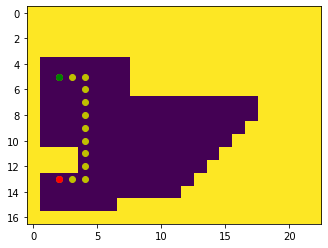

In [22]:
from planner_query import *

grid =  [ 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,
          1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,
          1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,
          1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,
          1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,
          1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,
          1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,
          1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,
          1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
grid = np.array(grid, dtype=np.uint8)
grid.resize(17,23)

# Instantiate the class PlannerQuery
pq = PlannerQuery(grid)
        
for i in range(0,10):
    # Generate a start and goal pair
    (start_node, goal_node) = pq.generate(plot=True)
    gmap = OccupancyGridMap.from_data(grid,1,1)
    gmap.plot()
    print("-----------------")
    path, path_px = a_star(start_node, goal_node, gmap,movement="4N")
    

    if path:
        # plot resulting path in pixels over the map
        #plot_path(path_px)
        path_arr = np.array(path)
        prevStep = (1,1,0)
        #nextStep = ((start_node[1])*0.152,(17-start_node[0])*0.152,0)
        #move_to_next(prevStep,nextStep,robot)
        #prevStep = nextStep
        for i in path_arr:
            graphStep = ((i[1])*0.152,(17-i[0])*0.152, 0)
            loc.plotter.plot_point(graphStep[0], graphStep[1],GT)
            
            nextStep = ((i[1])*0.152,(17-i[0])*0.152,0)
            move_to_next(prevStep,nextStep,robot)
            loc.plotter.plot_point(robot.get_gt_pose()[0], robot.get_gt_pose()[1], GT)
            loc.plotter.plot_point(robot.get_pose()[0], robot.get_pose()[1], ODOM)
            prevStep = nextStep
        print("MOVE FROM " + str(start_node) + " TO " + str(goal_node) + " COMPLETE!")
        robot.set_vel(0,0)
        start_node_px = gmap.get_index_from_coordinates(start_node[0], start_node[1])
        goal_node_px = gmap.get_index_from_coordinates(goal_node[0], goal_node[1])

        plt.plot(path_arr[:, 1], path_arr[:, 0], 'yo')
        plt.plot(start_node_px[1], start_node_px[0], 'ro')
        plt.plot(goal_node_px[1], goal_node_px[0], 'go')
    else:
        print('Goal is not reachable')

        # plot start and goal points over the map (in pixels)
        start_node_px = gmap.get_index_from_coordinates(start_node[0], start_node[1])
        goal_node_px = gmap.get_index_from_coordinates(goal_node[0], goal_node[1])

        plt.plot(start_node_px[1], start_node_px[0], 'ro')
        plt.plot(goal_node_px[1], goal_node_px[0], 'go')

    plt.show()

In [ ]:
cx,cy,ca = mapper.to_map(0,2.128,0)
#mapper.get_views(cx,cy,ca)
for i in range(0,start_points.shape[0]):
    get_sim_model(start_points[i],end_points[i])

# Bayes filter on the virtual robot
The cell below run the bayes filter algorithm for the pre-planned trajectory.

In [ ]:
# Reset Plots
robot.reset()
loc.plotter.reset_plot()

# Init Uniform Belief
loc.init_pose()

# Get Observation Data by executing a 360 degree rotation motion
loc.get_observation_data()

# Run Update Step
loc.update_step()
loc.print_update_stats(plot_data=True)
    
# Intialize the Trajectory object
traj = Trajectory(loc)

# Run through each motion steps
for t in range(0, traj.total_time_steps):

    print("\n\n-----------------", t, "-----------------")
    
    prev_odom, current_odom, prev_gt, current_gt = traj.execute_time_step(t)
    
    # Prediction Step
    loc.prediction_step(current_odom, prev_odom)
    loc.print_prediction_stats(plot_data=True)
    
    # Get Observation Data by executing a 360 degree rotation motion
    loc.get_observation_data()
    
    # Update Step    
    loc.update_step()
    loc.print_update_stats(plot_data=True)
    
        
    print("-------------------------------------")